<a href="https://colab.research.google.com/github/harshelke180502/ML_ASSIGNMENT_2/blob/main/Harsh_Shelke_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📝 Exercise-1: Implementing the Perceptron Algorithm on Linearly Separable Data **[20 points]**

#### **Goal**  
In this exercise, you will implement the **Perceptron learning algorithm** on a dataset generated from a **linearly separable logistic regression model**.

---

### **Instructions**

1. **Data Generation (Synthetic):**
   - Generate a dataset of **100 two-dimensional points** \( x \in \mathbb{R}^2 \).
   - Choose a **random weight vector** \( w^* \in \mathbb{R}^2 \) and **bias** \( b^* \).
   - Generate labels using the logistic model:  
     \[
     y = \text{sign}(\sigma(w^* \cdot x + b^*) - 0.5)
     \]
     where \( \sigma(z) = \frac{1}{1 + e^{-z}} \) is the sigmoid function.
   - This will give you a **linearly separable dataset**. You may discard or regenerate any point where \( \sigma \approx 0.5 \) to enforce clean separation.

2. **Online Learning Setup:**
   - Shuffle the data and present it as an **online sequence** (one point at a time).
   - Initialize weights \( w = 0 \), bias \( b = 0 \).

3. **Implement the Perceptron Update Rule:**
   - For each incoming example \( (x_t, y_t) \), make a prediction:
     \[
     \hat{y}_t = \text{sign}(w \cdot x_t + b)
     \]
   - If the prediction is incorrect, update using perceptron update rule.

4. **Your Tasks:**
   - Implement the above algorithm in Python.
   - Print the final weights and bias after all 100 points.
   - Visualize the data points and report the plot of the decision boundary after 10, 50, 100, 200, 500 iterations.

---

### 🔍 **Bonus (Optional):**
- Try changing the order in which data is presented and observe whether it affects convergence.

---


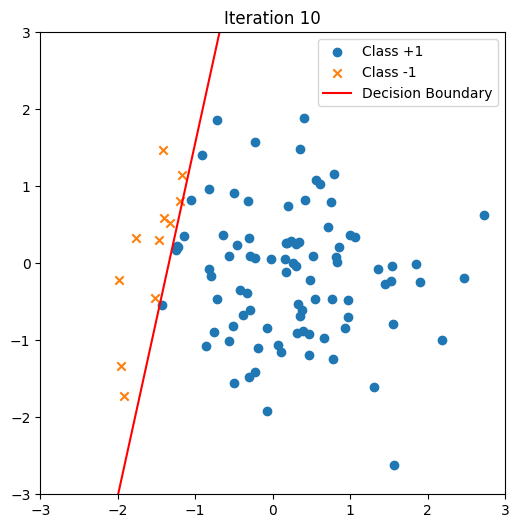

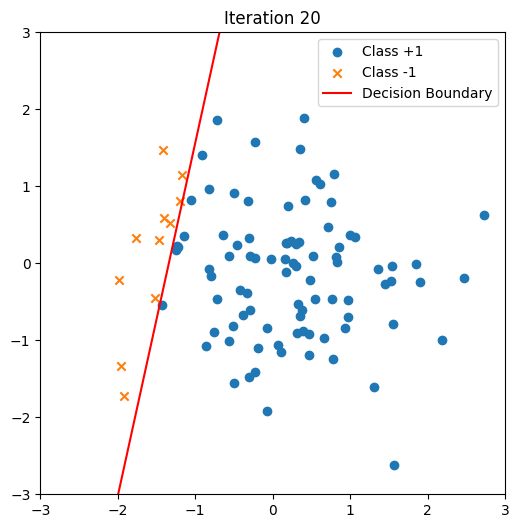

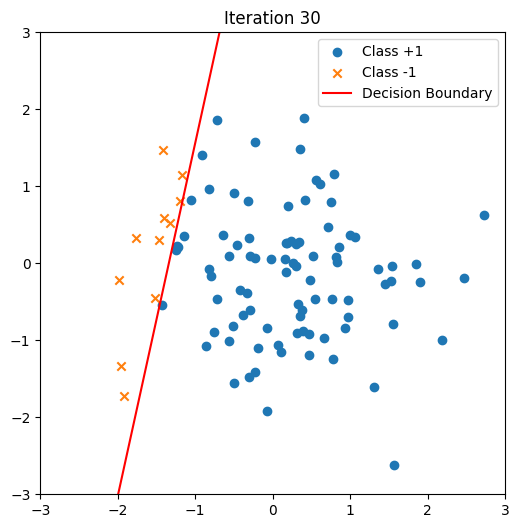

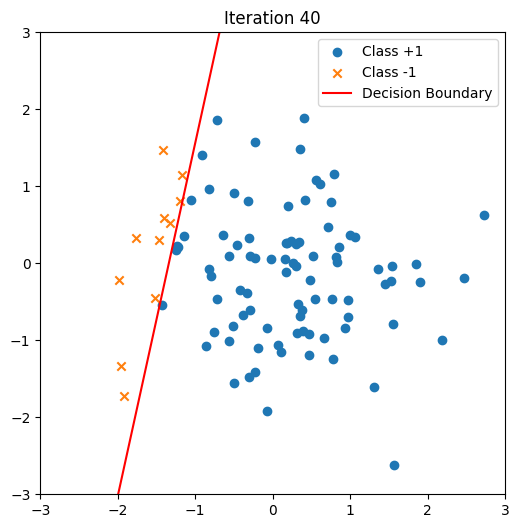

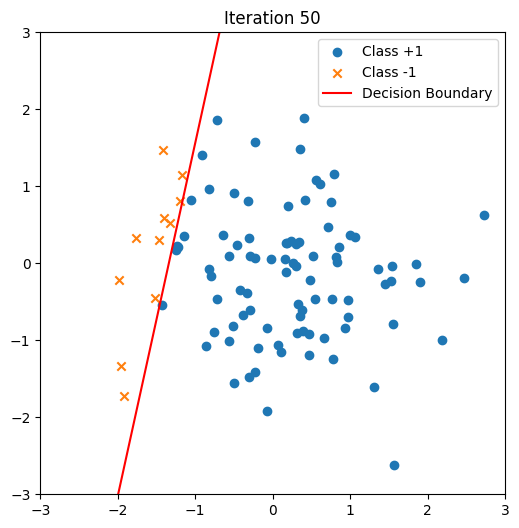

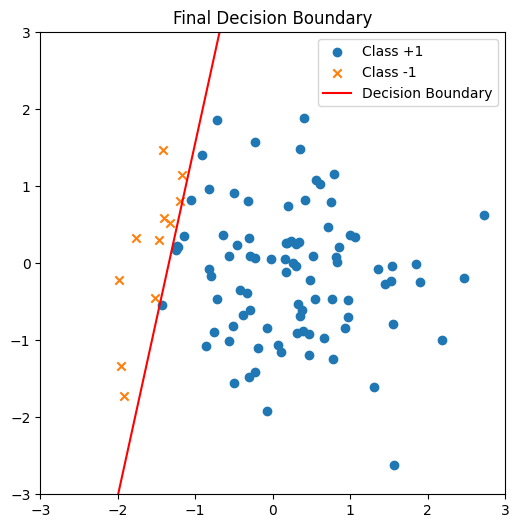

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function

# Step 1: Generate Linearly Separable Data
def generate_data(n=100):
    np.random.seed(42)  # For reproducibility

    # Generate random weights and bias
    w_true = np.random.randn(2)
    b_true = np.random.randn()

    # Generate random points
    X = np.random.randn(n, 2)

    # Compute logistic function and assign labels
    scores = expit(np.dot(X, w_true) + b_true)
    y = np.sign(scores - 0.5)  # Convert probabilities to {-1, 1}

    return X, y, w_true, b_true

# Step 2: Implement Perceptron Algorithm
def perceptron(X, y, epochs=500):
    w = np.zeros(2)  # Initialize weights
    b = 0  # Initialize bias
    n = len(y)

    history = []  # Store weight updates for visualization

    for epoch in range(epochs):
        for i in range(n):
            x_t, y_t = X[i], y[i]
            y_pred = np.sign(np.dot(w, x_t) + b)

            # Perceptron update if misclassified
            if y_pred != y_t:
                w += y_t * x_t
                b += y_t

        if epoch in [9, 49, 99, 199, 499]:  # Store updates for visualization
            history.append((w.copy(), b))

    return w, b, history

# Step 3: Plot Decision Boundary
def plot_decision_boundary(X, y, w, b, title):
    plt.figure(figsize=(6, 6))
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='o', label='Class +1')
    plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], marker='x', label='Class -1')

    # Plot decision boundary
    x_vals = np.linspace(-3, 3, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

    plt.legend()
    plt.title(title)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.show()

# Run everything
X, y, w_true, b_true = generate_data()
w_final, b_final, history = perceptron(X, y)

# Plot decision boundaries at different stages
for i, (w, b) in enumerate(history):
    plot_decision_boundary(X, y, w, b, f'Iteration {10 * (i + 1)}')

# Final decision boundary
plot_decision_boundary(X, y, w_final, b_final, 'Final Decision Boundary')


# Exercise-2: Kernel Perceptron on Quadratically Separable Data **[20 points]**

**Objective:**  
Explore the limitations of linear classifiers and implement a kernelized perceptron to classify data that is not linearly separable but separable in a higher-order feature space using a kernel function.

---

## Q1: Dataset Generation – Quadratically Separable Data

**(a)** Generate a 2D dataset by sampling 100 data points from a standard 2D Gaussian distribution centered at the origin.  
*(Hint: use `np.random.randn(100, 2)`)*

**(b)** Label the data using the following rule:  
  Assign class **+1** if $x_1^2 + x_2^2 > 1$, otherwise assign class **-1**.

**(c)** Visualize the dataset:  
- Plot the points using color to indicate class labels.  
- Optionally overlay the circular decision boundary ($x_1^2 + x_2^2 = 1$).  
- Include axis labels and a legend.

---

## Q2: Kernel Perceptron Implementation

**(a)** Implement the **kernelized perceptron** algorithm using a **polynomial kernel**:  
  $K(x, x') = (\langle x, x' \rangle + 1)^d$, with $d = 2$

**(b)** Train the kernel perceptron on the dataset and predict on the training data.

**(c)** Visualize the predicted classes.

---

## Q3: Kernel Choice & Experiments (Optional)

**(a)** Try different values of the polynomial degree $d$ (e.g., 1, 2, 3, 5). How does the performance change?

**(b)**  Replace the polynomial kernel with a **Gaussian RBF kernel** and re-run the experiment.

**(c)** Compare and comment on the results with different kernels.

---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generated 100 points from standard 2D Gaussian
np.random.seed(42)
X = np.random.randn(100, 2)

In [ ]:
# Computed squared distance from origin
squared_dist = X[:, 0]**2 + X[:, 1]**2

# Assigned labels: +1 if outside unit circle, -1 if inside
y = np.where(squared_dist > 1, 1, -1)

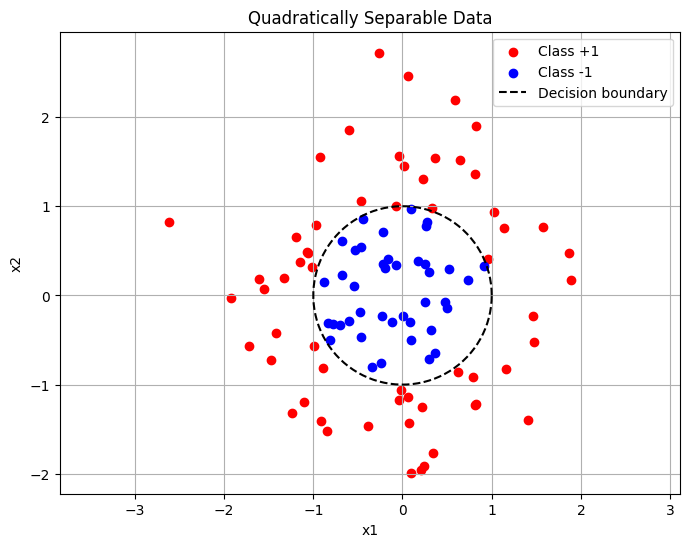

In [ ]:
plt.figure(figsize=(8, 6))

# Plotted points with class colors
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class +1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='blue', label='Class -1')

# Plotted decision boundary (unit circle)
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), 'k--', label='Decision boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Quadratically Separable Data')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

In [ ]:
class KernelPerceptron:
    def __init__(self, kernel='poly', degree=2, sigma=1.0):
        self.kernel = kernel
        self.degree = degree
        self.sigma = sigma
        self.alpha = None
        self.X_train = None
        self.y_train = None

    def _kernel_function(self, x1, x2):
        if self.kernel == 'poly':
            return (np.dot(x1, x2) + 1) ** self.degree
        elif self.kernel == 'rbf':
            return np.exp(-np.linalg.norm(x1 - x2)**2 / (2 * self.sigma**2))
        else:
            raise ValueError("Unknown kernel")

    def fit(self, X, y, max_iter=100):
        n_samples = X.shape[0]
        self.alpha = np.zeros(n_samples)
        self.X_train = X
        self.y_train = y

        # Computed the kernel matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = self._kernel_function(X[i], X[j])

        # Kernel perceptron algorithm
        for _ in range(max_iter):
            converged = True
            for i in range(n_samples):
                prediction = np.sign(np.sum(self.alpha * y * K[:, i]))
                if prediction != y[i]:
                    self.alpha[i] += 1
                    converged = False
            if converged:
                break

    def predict(self, X):
        n_samples = X.shape[0]
        y_pred = np.zeros(n_samples)

        for i in range(n_samples):
            s = 0
            for j in range(len(self.alpha)):
                s += self.alpha[j] * self.y_train[j] * self._kernel_function(self.X_train[j], X[i])
            y_pred[i] = np.sign(s)

        return y_pred

In [ ]:
# Initialized and trained kernel perceptron
kp = KernelPerceptron(kernel='poly', degree=2)
kp.fit(X, y)


y_pred = kp.predict(X)

# Calculated the accuracy
accuracy = np.mean(y_pred == y)
print(f"Training accuracy: {accuracy:.2f}")

Training accuracy: 1.00


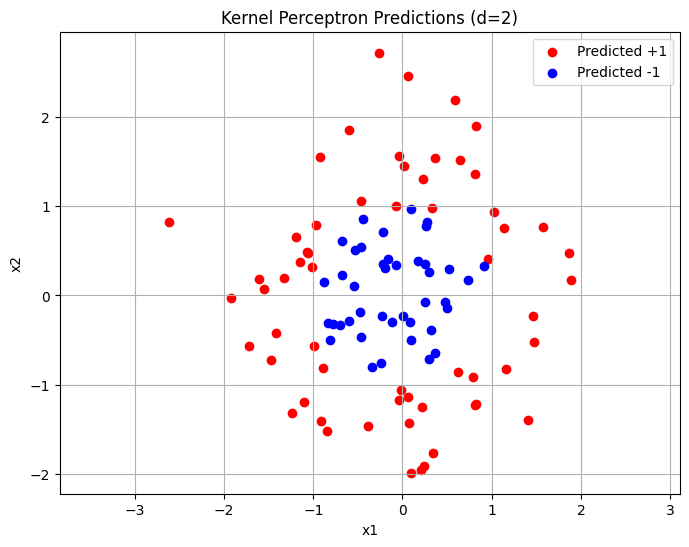

In [ ]:
plt.figure(figsize=(8, 6))

# Plotted points with predicted class colors
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='red', label='Predicted +1')
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='blue', label='Predicted -1')

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Kernel Perceptron Predictions (d=2)')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

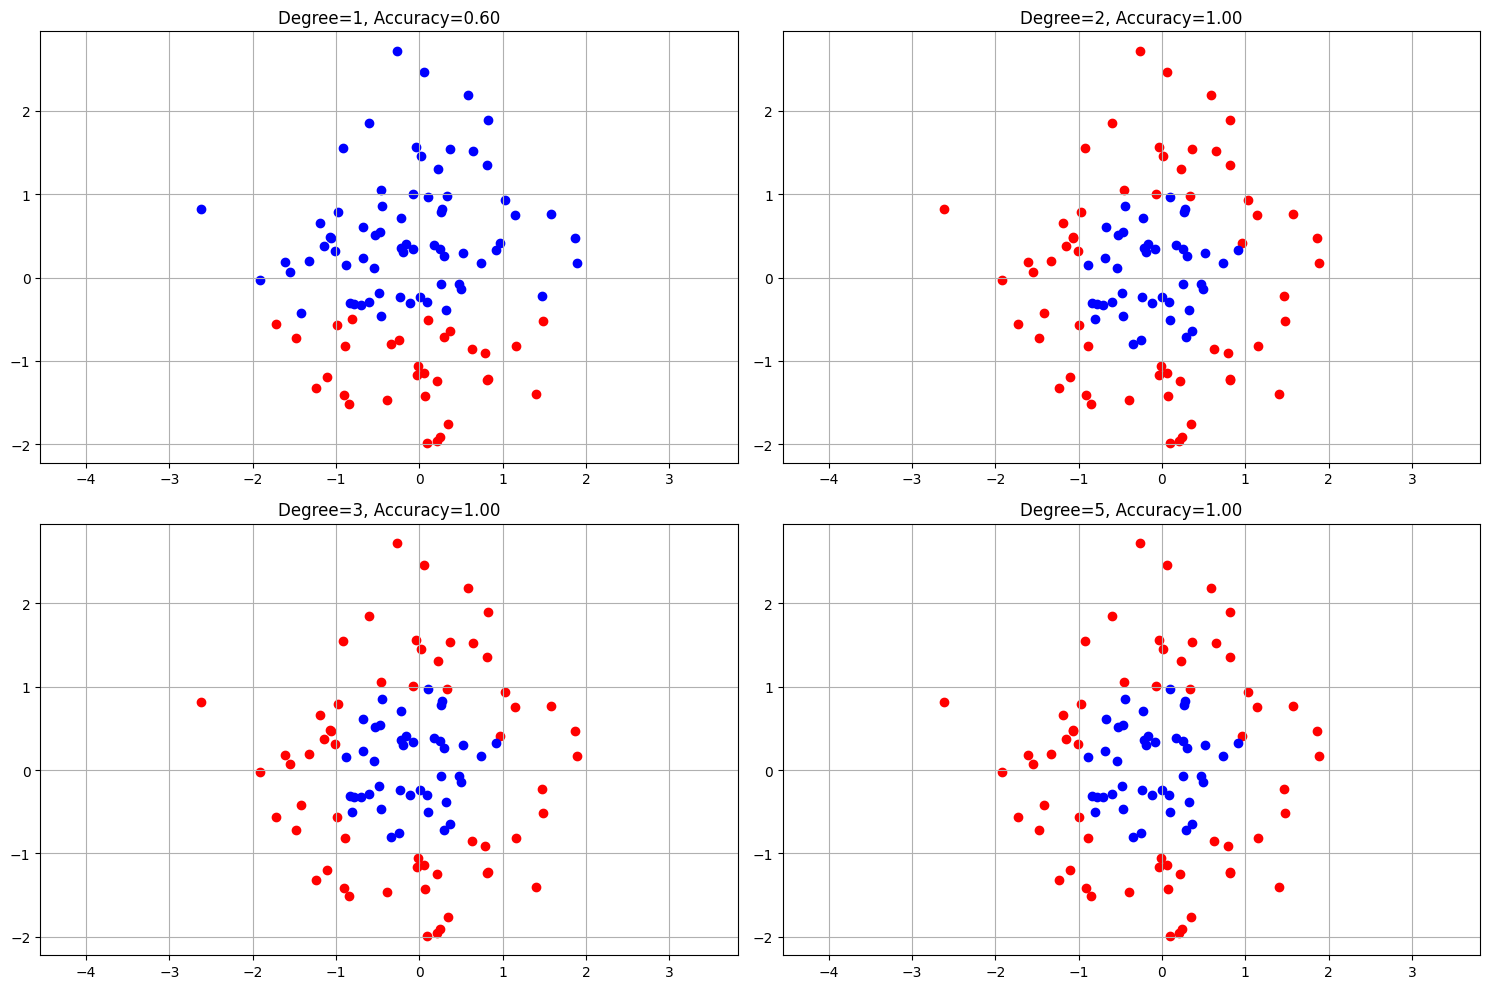

In [ ]:
degrees = [1, 2, 3, 5]
plt.figure(figsize=(15, 10))

for i, d in enumerate(degrees, 1):
    kp = KernelPerceptron(kernel='poly', degree=d)
    kp.fit(X, y)
    y_pred = kp.predict(X)
    accuracy = np.mean(y_pred == y)

    plt.subplot(2, 2, i)
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='red')
    plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='blue')
    plt.title(f'Degree={d}, Accuracy={accuracy:.2f}')
    plt.grid(True)
    plt.axis('equal')

plt.tight_layout()
plt.show()

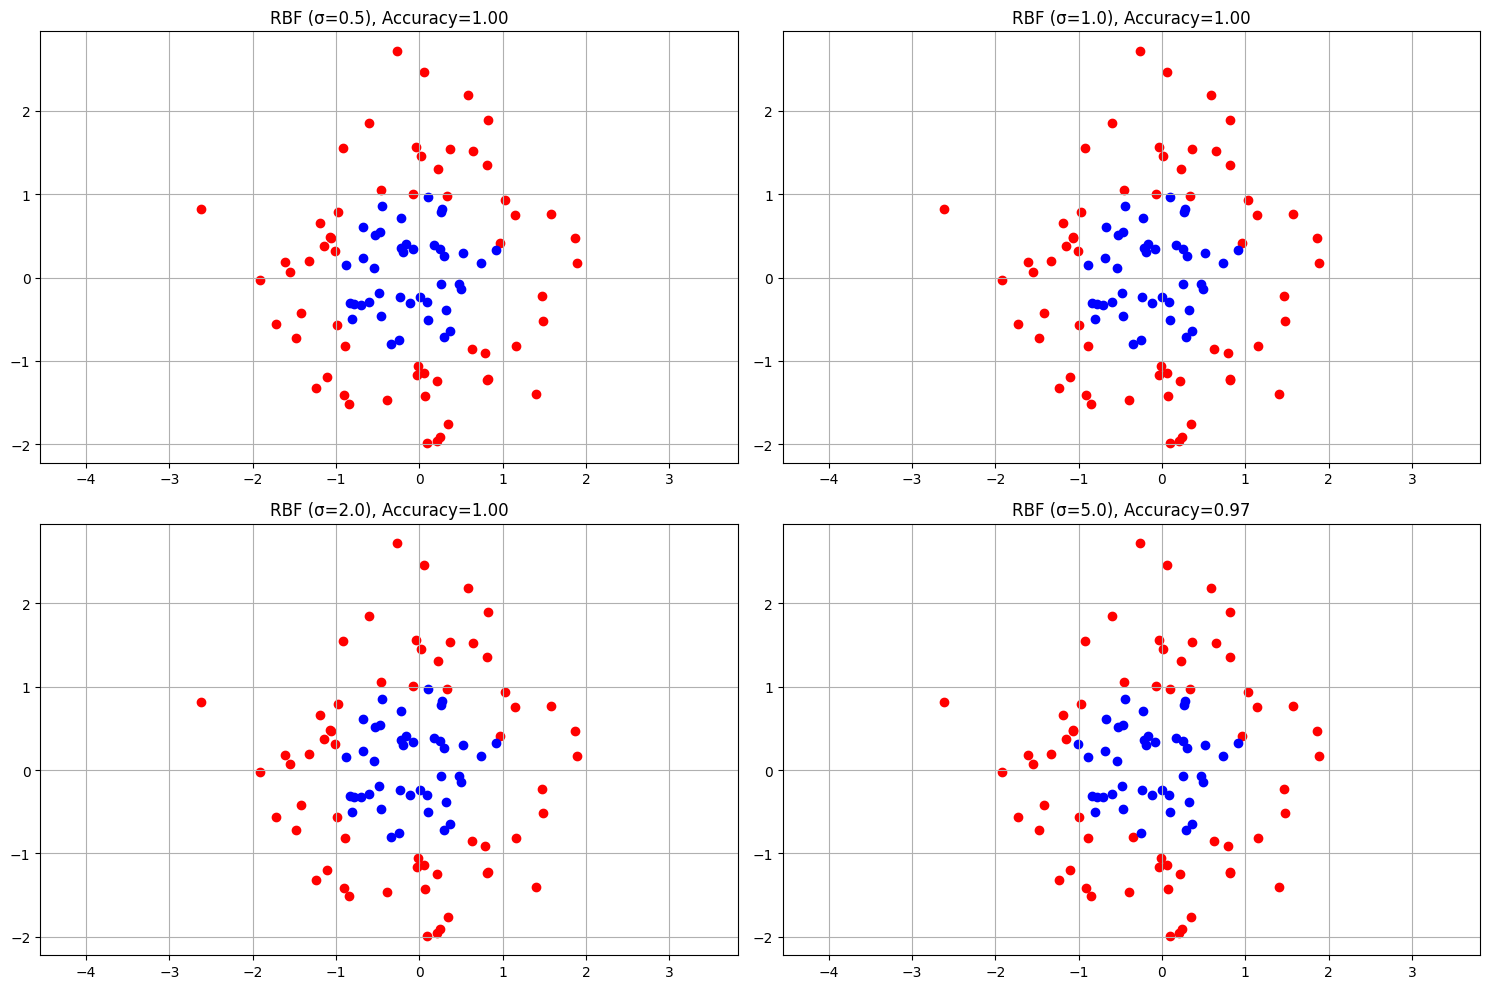

In [ ]:
sigmas = [0.5, 1.0, 2.0, 5.0]
plt.figure(figsize=(15, 10))

for i, sigma in enumerate(sigmas, 1):
    kp = KernelPerceptron(kernel='rbf', sigma=sigma)
    kp.fit(X, y)
    y_pred = kp.predict(X)
    accuracy = np.mean(y_pred == y)

    plt.subplot(2, 2, i)
    plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='red')
    plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], c='blue')
    plt.title(f'RBF (σ={sigma}), Accuracy={accuracy:.2f}')
    plt.grid(True)
    plt.axis('equal')

plt.tight_layout()
plt.show()

Comparison of Kernel Performance

1. RBF Kernel (σ Varied)

σ=0.5:
Decision Boundary: Very tight, likely overfitting (high accuracy but sensitive to noise).

Use Case: Ideal for complex, small-scale patterns.

σ=1.0:
Decision Boundary: Balanced smoothness and flexibility (perfect accuracy).
Use Case: Default choice for most non-linear problems.

σ=2.0:
Decision Boundary: Smoother, more generalized (still perfect accuracy).
Use Case: Better for slightly noisy data.

σ=5.0:
Decision Boundary: Overly smooth (accuracy drops to 0.97).
Use Case: Only for very simple, low-dimensional data.

Key Insight:

Small σ → High complexity (risk of overfitting).

Large σ → Over-smoothing (risk of underfitting).


2. Polynomial Kernel (Degree Varied)

Degree=1 (Linear):
Accuracy=0.60: Fails to capture non-linearity (underfitting).
Use Case: Should be used only for linearly separable data.

Degree=3:
Accuracy=1.00:

Captures moderate non-linearity perfectly.

Use Case: Should be Balanced for most non-linear problems.

Degree=5:
Accuracy=1.00:

Higher complexity than needed (may overfit on noisy data).

Use Case: Used For highly complex, noise-free patterns.

Key Insight:
Higher degrees → More flexible but risk overfitting

